<h1 align="center">CUSTOMER SUPPORT DATA ANALYTICS</h1>

**DATA EXPLORATION**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_support_tickets.csv")

In [3]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,22-03-2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,01-06-2023 12:15,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,22-05-2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,01-06-2023 16:45,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,14-07-2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,01-06-2023 11:14,01-06-2023 18:05,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,13-11-2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,01-06-2023 07:29,01-06-2023 01:57,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,04-02-2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,01-06-2023 00:12,01-06-2023 19:53,1.0


In [4]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [5]:
df['Ticket Description'].sample(5)

319     I've encountered a data loss issue with my {pr...
3120    I've encountered a data loss issue with my {pr...
3319    I'm having an issue with the {product_purchase...
1439    I'm having an issue with the {product_purchase...
1286    I'm having an issue with the {product_purchase...
Name: Ticket Description, dtype: object

**CREATING NEW COLUMN FOR CAPTURING ENTIRE TEXT TO UNDERSTAND THE ISSUE**

In [6]:
df['Issue Description'] = df['Ticket Subject'] + ' ' + df['Ticket Description']

In [7]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Issue Description
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,22-03-2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,01-06-2023 12:15,NaN,NaN,Product setup I'm having an issue with the {pr...
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,22-05-2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,01-06-2023 16:45,NaN,NaN,Peripheral compatibility I'm having an issue w...
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,14-07-2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,01-06-2023 11:14,01-06-2023 18:05,3.0,Network problem I'm facing a problem with my {...
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,13-11-2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,01-06-2023 07:29,01-06-2023 01:57,3.0,Account access I'm having an issue with the {p...
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,04-02-2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,01-06-2023 00:12,01-06-2023 19:53,1.0,Data loss I'm having an issue with the {produc...


In [8]:
df['Ticket Subject'].nunique()

16

**FINDING THE OPTIMAL K VALUE TO USE IN KMEANS CLUSTERING TO CREATE CLUSTERS FROM ISSUE DESCRIPTION**

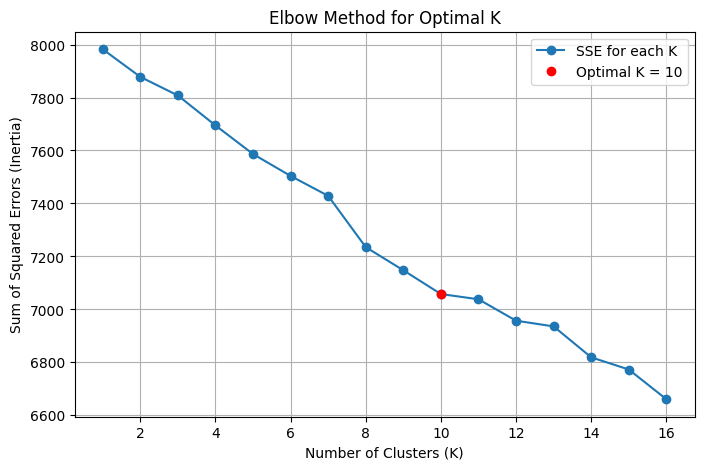

Optimal K detected: 10


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

# 1. Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Issue Description']) 

# 2. Use the Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 17)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 3. Use kneed to find the "elbow" point
kl = KneeLocator(K_range, inertia, curve='convex', direction='decreasing')
optimal_k = kl.elbow

# 4. Plot the Elbow Curve with the optimal K marked
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', label='SSE for each K')
plt.plot(optimal_k, inertia[optimal_k - 1], 'ro', label=f'Optimal K = {optimal_k}')  # red dot
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (Inertia)')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal K detected:", optimal_k)

**CREATING 'CLUSTER' AND 'CLUSTER KEYWORDS' COLUMNS AS A RESULT OF KMEANS**

In [10]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)  

In [11]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Issue Description,Cluster
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,22-03-2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,01-06-2023 12:15,NaN,NaN,Product setup I'm having an issue with the {pr...,1
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,22-05-2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,01-06-2023 16:45,NaN,NaN,Peripheral compatibility I'm having an issue w...,4
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,14-07-2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,01-06-2023 11:14,01-06-2023 18:05,3.0,Network problem I'm facing a problem with my {...,7
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,13-11-2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,01-06-2023 07:29,01-06-2023 01:57,3.0,Account access I'm having an issue with the {p...,2
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,04-02-2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,01-06-2023 00:12,01-06-2023 19:53,1.0,Data loss I'm having an issue with the {produc...,7


In [12]:
df.Cluster.value_counts()

Cluster
7    3724
1    1518
4     478
8     473
3     449
9     442
2     427
5     417
6     363
0     178
Name: count, dtype: int64

In [13]:
df[['Ticket Subject','Cluster']].head()

,Ticket Subject,Cluster
0,Product setup,1
1,Peripheral compatibility,4
2,Network problem,7
3,Account access,2
4,Data loss,7


**UNDERSTANDING WHETHER THERE IS ANY CORRELATION BETWEEN EXISTING TICKET SUBJECT COLUMN AND CREATED CLUSTER GROUPS**

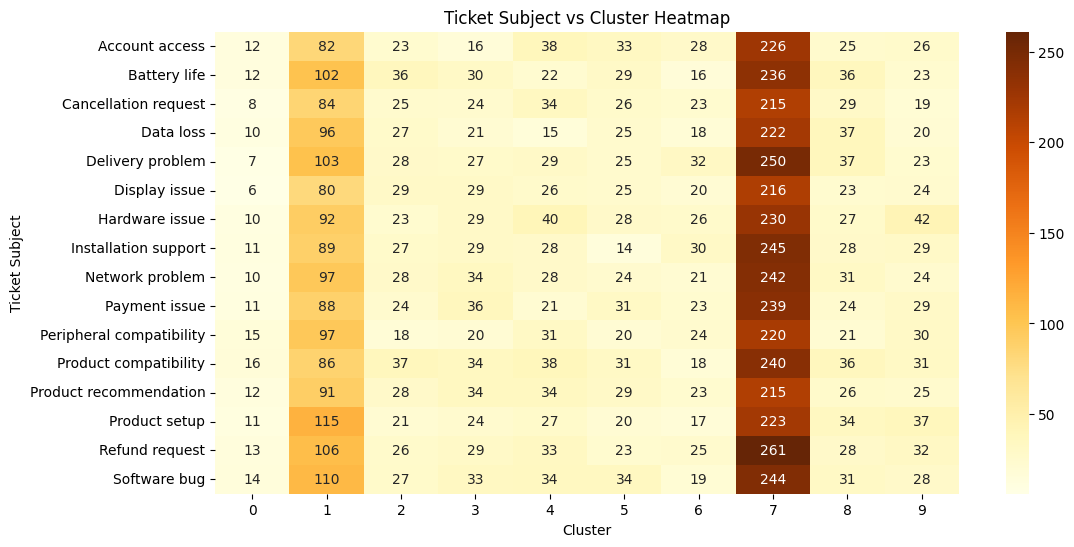

In [14]:
import seaborn as sns

heatmap_data = pd.crosstab(df['Ticket Subject'], df['Cluster'])

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Ticket Subject vs Cluster Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Ticket Subject')
plt.show()

**CONCATENATING ISSUE DESCRIPTIONS BASED ON CLUSTER GROUPS**

In [36]:
df_cluster = df.groupby('Cluster')['Issue Description'].agg(' '.join).reset_index()

**TRUNCATING THE ISSUE DESCRIPTION TO 512 LENGTH TEXT FOR FURTHER REFINED DATA CATEGORIZATION**

In [37]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")

def truncate_text(text):
    return tokenizer.decode(
        tokenizer(text, truncation=True, max_length=512)['input_ids'],
        skip_special_tokens=True
    )

df_cluster['truncated_issue_desc'] = df_cluster['Issue Description'].apply(truncate_text)

In [38]:
df_cluster

,Cluster,Issue Description,truncated_issue_desc
0,0,Refund request I'm having trouble connecting m...,Refund request I'm having trouble connecting m...
1,1,Product setup I'm having an issue with the {pr...,Product setup I'm having an issue with the pro...
2,2,Account access I'm having an issue with the {p...,Account access I'm having an issue with the pr...
3,3,Installation support I'm having an issue with ...,Installation support I'm having an issue with ...
4,4,Peripheral compatibility I'm having an issue w...,Peripheral compatibility I'm having an issue w...
5,5,Product setup I've recently set up my {product...,Product setup I've recently set up my product_...
6,6,Refund request I'm unable to access my {produc...,Refund request I'm unable to access my product...
7,7,Network problem I'm facing a problem with my {...,Network problem I'm facing a problem with my p...
8,8,Battery life I'm having an issue with the {pro...,Battery life I'm having an issue with the prod...
9,9,Display issue I'm having an issue with the {pr...,Display issue I'm having an issue with the pro...


**DOWNLOADING GPT4ALL TO GENERATE A SUITABLE LABEL FOR THE ISSUE DESCRIPTION DESPITE THE TICKET TYPE (TOO GENERAL) AND TICKET SUBJECT (POTENTIAL INACCURACY)**

In [42]:
from gpt4all import GPT4All

model = GPT4All("mistral-7b-openorca.Q4_0.gguf") 

Downloading: 100%|███████████████████████████████████████████████████████████████| 4.11G/4.11G [05:50<00:00, 11.7MiB/s]


In [43]:
from gpt4all import GPT4All
from tqdm import tqdm

# Load GPT4All model
model = GPT4All("mistral-7b-openorca.Q4_0.gguf")

# Define label generator
def generate_label(description):
    prompt = f"{description} ---- Based on this description, create a short and relevant category label of two words keeping in mind the context. Don't just take words from the description."
    with model.chat_session():
        response = model.generate(prompt, max_tokens=10)  
    label = response.strip().split('.')[0]
    return label

tqdm.pandas()
df_cluster['Main Issue'] = df_cluster['truncated_issue_desc'].progress_apply(generate_label)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [25:02<00:00, 150.21s/it]


In [44]:
df_cluster

,Cluster,Issue Description,truncated_issue_desc,Main Issue
0,0,Refund request I'm having trouble connecting m...,Refund request I'm having trouble connecting m...,Wi-Fi connection issue\nProduct compatibility ...
1,1,Product setup I'm having an issue with the {pr...,Product setup I'm having an issue with the pro...,Issue with Product Setup
2,2,Account access I'm having an issue with the {p...,Account access I'm having an issue with the pr...,Product Issue Assistance
3,3,Installation support I'm having an issue with ...,Installation support I'm having an issue with ...,Firmware Update Issue
4,4,Peripheral compatibility I'm having an issue w...,Peripheral compatibility I'm having an issue w...,Product Issue Assistance
5,5,Product setup I've recently set up my {product...,Product setup I've recently set up my product_...,Product setup issue troubleshooting\nSecurity ...
6,6,Refund request I'm unable to access my {produc...,Refund request I'm unable to access my product...,Account Access Issue\nPassword Recovery\nProdu...
7,7,Network problem I'm facing a problem with my {...,Network problem I'm facing a problem with my p...,Product Purchasing Issue
8,8,Battery life I'm having an issue with the {pro...,Battery life I'm having an issue with the prod...,Product Issue Assistance
9,9,Display issue I'm having an issue with the {pr...,Display issue I'm having an issue with the pro...,Issue with product_purchased - Software Update


In [45]:
df_cluster['Main Issue'].value_counts()

Main Issue
Product Issue Assistance                                  3
Wi-Fi connection issue\nProduct compatibility issue       1
Issue with Product Setup                                  1
Firmware Update Issue                                     1
Product setup issue troubleshooting\nSecurity concerns    1
Account Access Issue\nPassword Recovery\nProduct Com      1
Product Purchasing Issue                                  1
Issue with product_purchased - Software Update            1
Name: count, dtype: int64

In [46]:
df_cluster['Main Issue'].nunique()

8

In [50]:
df_cluster['Main Issue'] = df_cluster['Main Issue'].replace({'Wi-Fi connection issue\nProduct compatibility issue':'Wi-Fi Connection and Product Compatibility Issue',
                                                             'Product setup issue troubleshooting\nSecurity concerns':'Product Setup and Security Issue',
                                                             'Account Access Issue\nPassword Recovery\nProduct Com':'Account Access and Recovery Issue'})

In [51]:
df_cluster['Main Issue'].value_counts()

Main Issue
Product Issue Assistance                            3
Wi-Fi Connection and Product Compatibility Issue    1
Product Setup Issue                                 1
Firmware Update Issue                               1
Product Setup and Security Issue                    1
Account Access and Recovery Issue                   1
Product Purchasing Issue                            1
Software Update Issue                               1
Name: count, dtype: int64

In [52]:
df_cluster['Main Issue'] = df_cluster['Main Issue'].replace({'Product Issue Assistance':'Product Setup Issue',
                                                             'Product Setup and Security Issue':'Product Setup Issue'})

In [53]:
df_cluster['Main Issue'].value_counts()

Main Issue
Product Setup Issue                                 5
Wi-Fi Connection and Product Compatibility Issue    1
Firmware Update Issue                               1
Account Access and Recovery Issue                   1
Product Purchasing Issue                            1
Software Update Issue                               1
Name: count, dtype: int64

In [54]:
df_cluster['Main Issue'].nunique()

6

In [55]:
df_cluster

,Cluster,Issue Description,truncated_issue_desc,Main Issue
0,0,Refund request I'm having trouble connecting m...,Refund request I'm having trouble connecting m...,Wi-Fi Connection and Product Compatibility Issue
1,1,Product setup I'm having an issue with the {pr...,Product setup I'm having an issue with the pro...,Product Setup Issue
2,2,Account access I'm having an issue with the {p...,Account access I'm having an issue with the pr...,Product Setup Issue
3,3,Installation support I'm having an issue with ...,Installation support I'm having an issue with ...,Firmware Update Issue
4,4,Peripheral compatibility I'm having an issue w...,Peripheral compatibility I'm having an issue w...,Product Setup Issue
5,5,Product setup I've recently set up my {product...,Product setup I've recently set up my product_...,Product Setup Issue
6,6,Refund request I'm unable to access my {produc...,Refund request I'm unable to access my product...,Account Access and Recovery Issue
7,7,Network problem I'm facing a problem with my {...,Network problem I'm facing a problem with my p...,Product Purchasing Issue
8,8,Battery life I'm having an issue with the {pro...,Battery life I'm having an issue with the prod...,Product Setup Issue
9,9,Display issue I'm having an issue with the {pr...,Display issue I'm having an issue with the pro...,Software Update Issue


**MERGING INTO A FINAL DATAFRAME**

In [56]:
df_final = pd.merge(df, df_cluster[['Cluster', 'Main Issue']], on='Cluster', how='left')

In [57]:
df_final.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Issue Description,Cluster,Main Issue
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,22-03-2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,01-06-2023 12:15,NaN,NaN,Product setup I'm having an issue with the {pr...,1,Product Setup Issue
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,22-05-2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,01-06-2023 16:45,NaN,NaN,Peripheral compatibility I'm having an issue w...,4,Product Setup Issue
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,14-07-2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,01-06-2023 11:14,01-06-2023 18:05,3.0,Network problem I'm facing a problem with my {...,7,Product Purchasing Issue
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,13-11-2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,01-06-2023 07:29,01-06-2023 01:57,3.0,Account access I'm having an issue with the {p...,2,Product Setup Issue
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,04-02-2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,01-06-2023 00:12,01-06-2023 19:53,1.0,Data loss I'm having an issue with the {produc...,7,Product Purchasing Issue


**DROPPING SOME COLUMNS THAT ARE NOT REQUIRED FOR FURTHER ANALYSIS IN MS EXCEL**

In [59]:
df_customer = df_final.drop(['Ticket ID','Customer Name','Customer Email','Customer Age','Customer Gender','Product Purchased','Ticket Subject',
                            'Ticket Description','Resolution','Ticket Channel','Issue Description','Cluster'],axis = 1)

In [60]:
df_customer.head()

,Date of Purchase,Ticket Type,Ticket Status,Ticket Priority,First Response Time,Time to Resolution,Customer Satisfaction Rating,Main Issue
0,22-03-2021,Technical issue,Pending Customer Response,Critical,01-06-2023 12:15,NaN,NaN,Product Setup Issue
1,22-05-2021,Technical issue,Pending Customer Response,Critical,01-06-2023 16:45,NaN,NaN,Product Setup Issue
2,14-07-2020,Technical issue,Closed,Low,01-06-2023 11:14,01-06-2023 18:05,3.0,Product Purchasing Issue
3,13-11-2020,Billing inquiry,Closed,Low,01-06-2023 07:29,01-06-2023 01:57,3.0,Product Setup Issue
4,04-02-2020,Billing inquiry,Closed,Low,01-06-2023 00:12,01-06-2023 19:53,1.0,Product Purchasing Issue


In [64]:
df_customer.shape

(8469, 8)

**SAVING THE FINAL DATAFRAME IN THE FORM OF AN EXCEL FILE**

In [63]:
df_customer.to_excel("customer_support_tickets_final.xlsx", index=False)